In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming the dataset is downloaded as 'heart_attack_dataset.csv'
# Replace 'path/to/your/dataset.csv' with the actual path to your downloaded dataset
df = pd.read_csv('./data/Medicaldataset.csv')

print("--- Dataset Head ---")
print(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Dataset Description (Numerical Features) ---")
print(df.describe())

print("\n--- Missing Values Check ---")
print(df.isnull().sum())

--- Dataset Head ---
   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------

In [33]:
# Set plot and seaborn settings for prettier plots
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'axes.prop_cycle': plt.cycler('color', ['tab:blue'])  # Set default color to tab:blue
})

sns.set_context("notebook", font_scale=1.2)
sns.set_palette(["tab:blue", "tab:orange"])


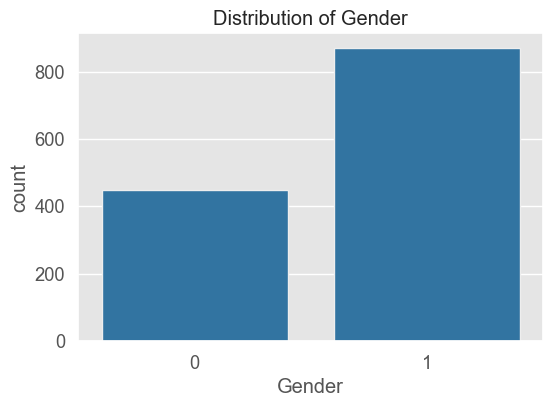


--- Value Counts for Gender ---
Gender
1    870
0    449
Name: count, dtype: int64

--- Value Proportions for Gender ---
Gender
1    65.95906
0    34.04094
Name: proportion, dtype: float64


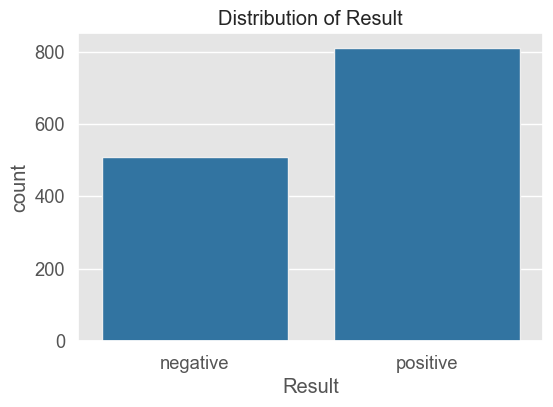


--- Value Counts for Result ---
Result
positive    810
negative    509
Name: count, dtype: int64

--- Value Proportions for Result ---
Result
positive    61.410159
negative    38.589841
Name: proportion, dtype: float64


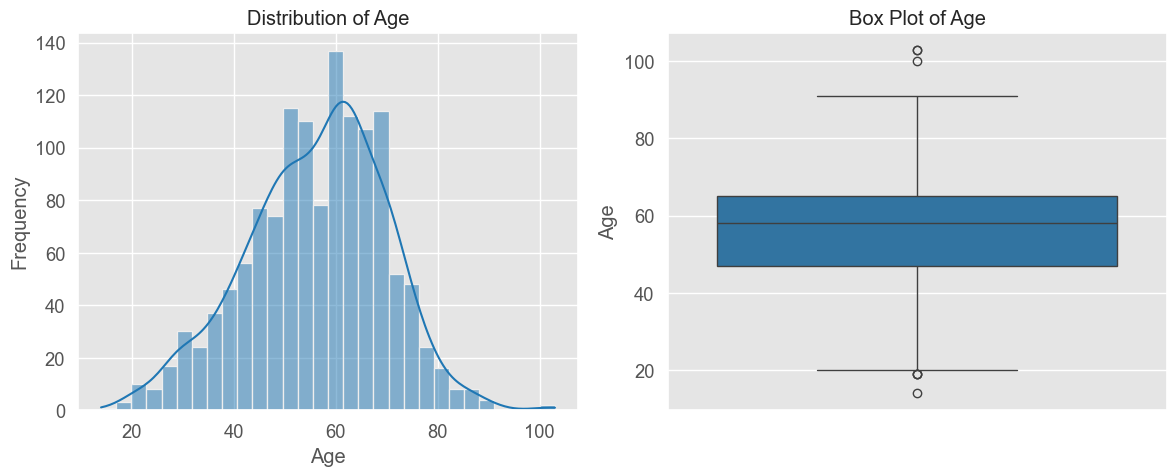


--- Skewness for Age ---
-0.23921873824246861

--- Kurtosis for Age ---
-0.023992066974543924


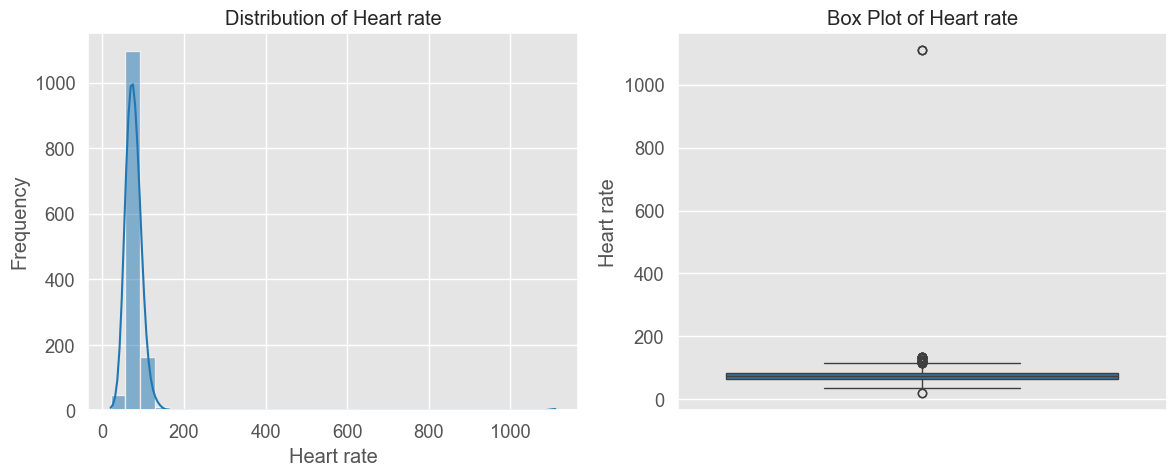


--- Skewness for Heart rate ---
18.24771989662879

--- Kurtosis for Heart rate ---
362.9547026291248


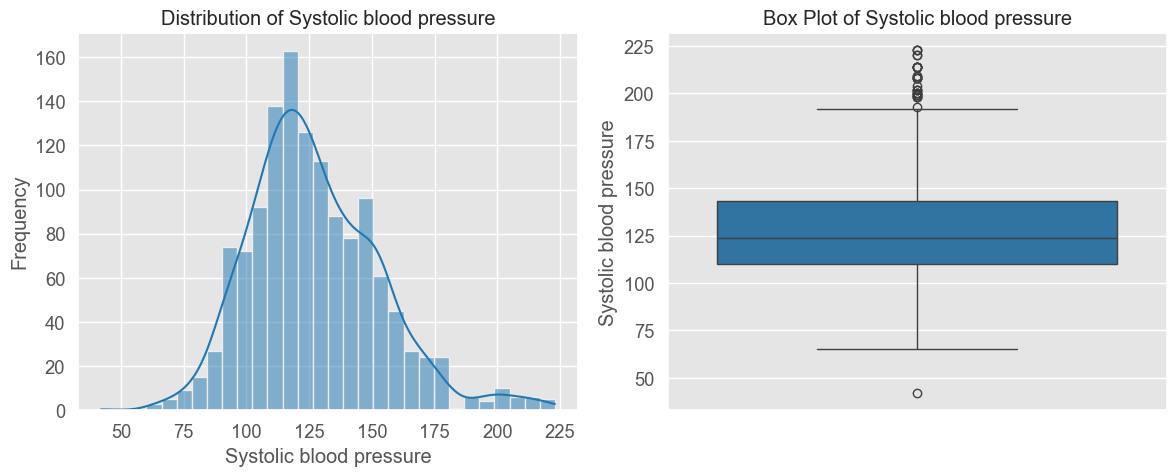


--- Skewness for Systolic blood pressure ---
0.6852460958110306

--- Kurtosis for Systolic blood pressure ---
0.9519274464977725


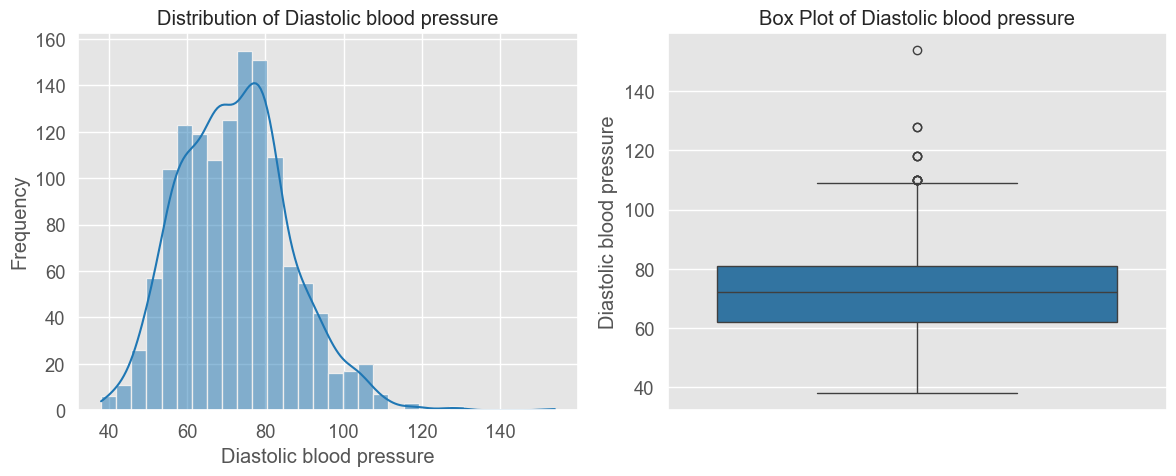


--- Skewness for Diastolic blood pressure ---
0.48920228416877803

--- Kurtosis for Diastolic blood pressure ---
0.8653222430996901


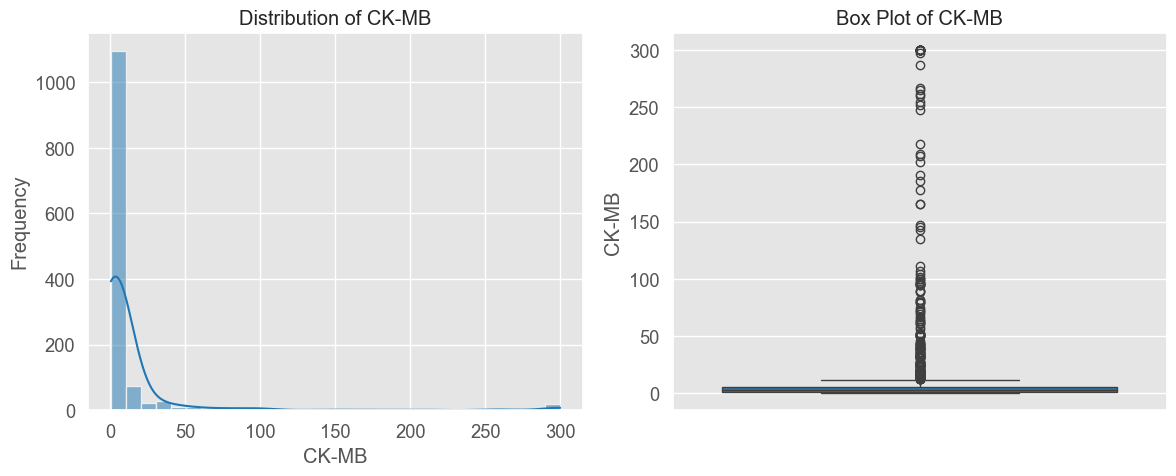


--- Skewness for CK-MB ---
4.978095271058858

--- Kurtosis for CK-MB ---
25.490557147976634


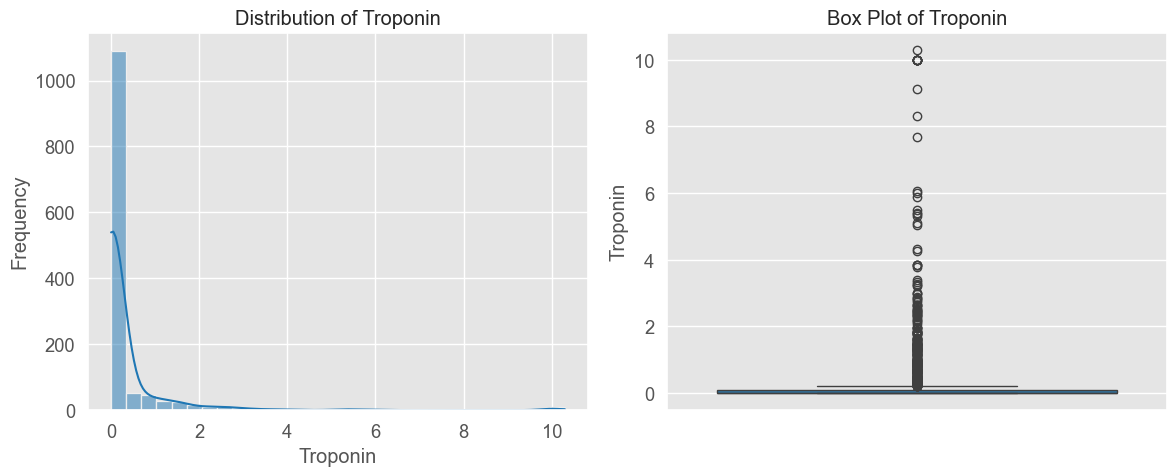


--- Skewness for Troponin ---
5.799106921990377

--- Kurtosis for Troponin ---
40.01658826744304


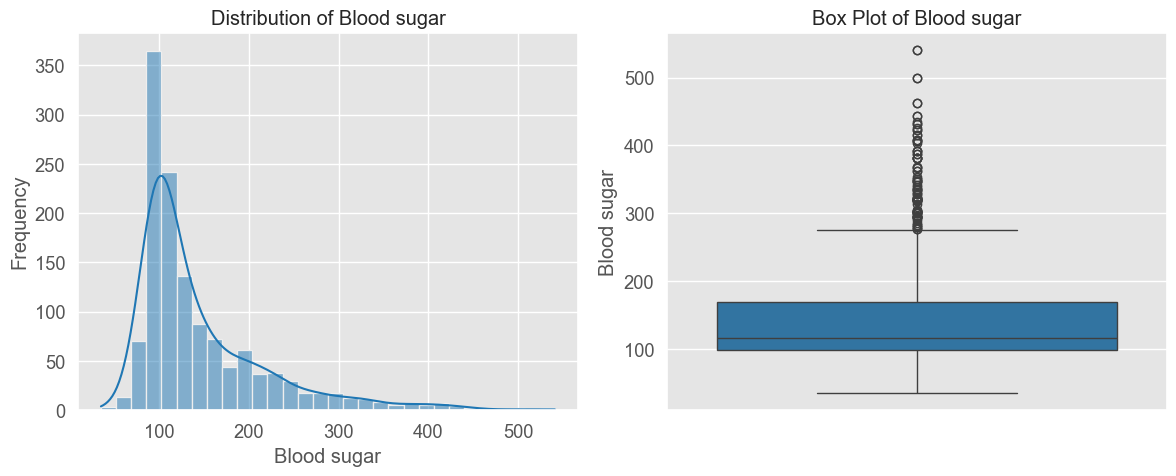


--- Skewness for Blood sugar ---
1.933474909905609

--- Kurtosis for Blood sugar ---
4.120408067403707


In [34]:
# --- Categorical Features ---
categorical_cols = ['Gender', 'Result']  # Ensure column names match the dataframe
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()
    print(f"\n--- Value Counts for {col} ---")
    print(df[col].value_counts())
    print(f"\n--- Value Proportions for {col} ---")
    print(df[col].value_counts(normalize=True) * 100)

# --- Numerical Features ---
numerical_cols = ['Age', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'CK-MB', 'Troponin', 'Blood sugar']  # Ensure column names match the dataframe
for col in numerical_cols:
    plt.figure(figsize=(12, 5))

    # Histogram and KDE
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Box plot for outliers
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()

    print(f"\n--- Skewness for {col} ---")
    print(df[col].skew())
    print(f"\n--- Kurtosis for {col} ---")
    print(df[col].kurtosis())

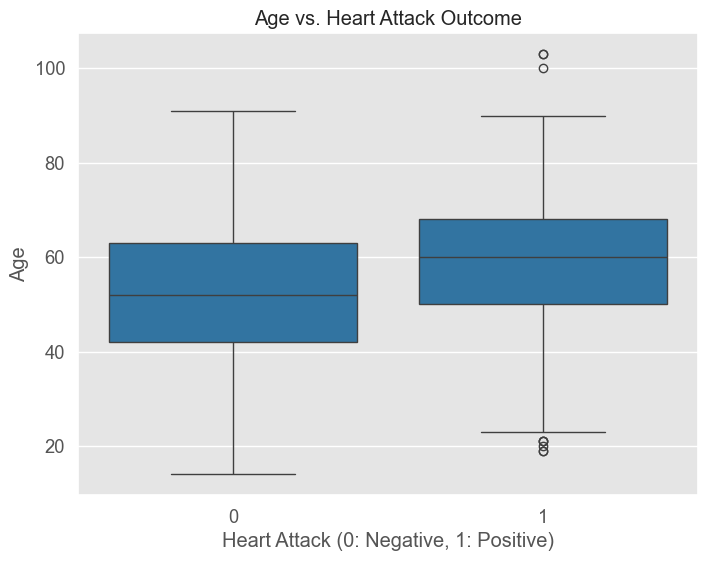


--- T-test for Age vs. Output ---
T-statistic: -8.78, P-value: 0.000
There is a statistically significant difference in Age between positive and negative heart attack outcomes.


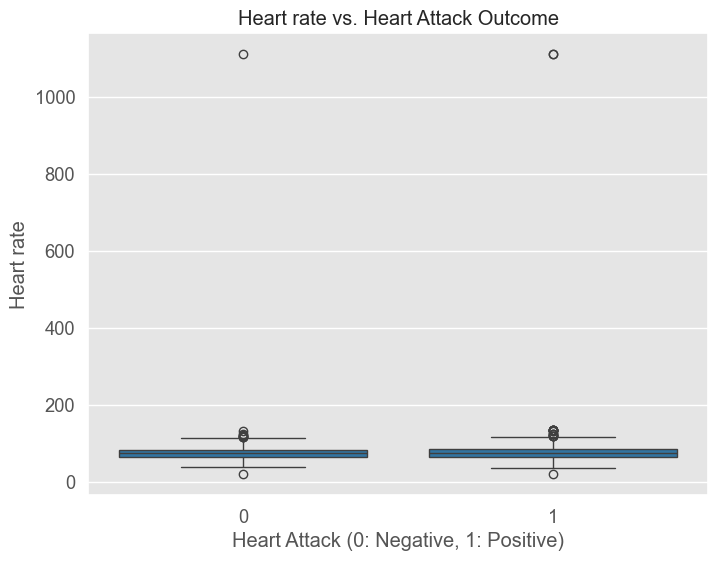


--- T-test for Heart rate vs. Output ---
T-statistic: -0.26, P-value: 0.797
There is no statistically significant difference in Heart rate between positive and negative heart attack outcomes.


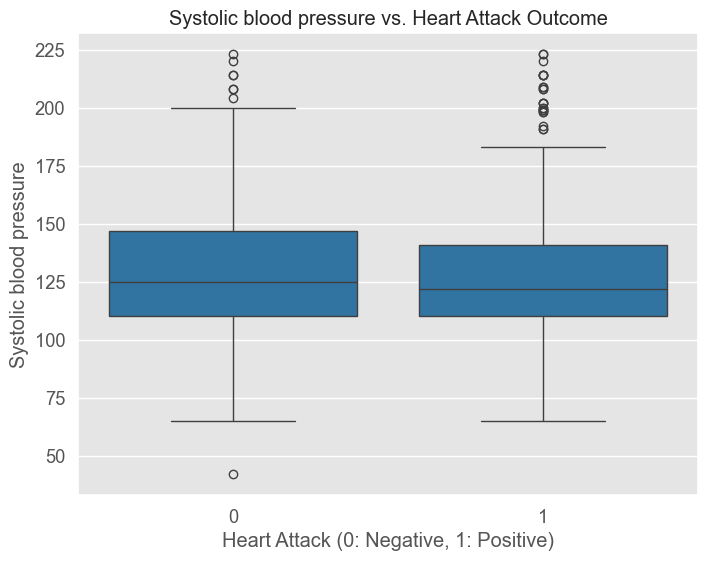


--- T-test for Systolic blood pressure vs. Output ---
T-statistic: 0.75, P-value: 0.456
There is no statistically significant difference in Systolic blood pressure between positive and negative heart attack outcomes.


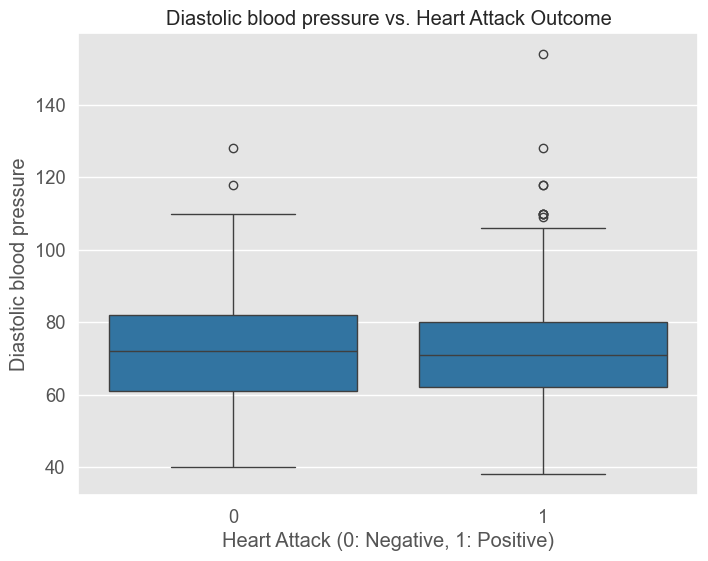


--- T-test for Diastolic blood pressure vs. Output ---
T-statistic: 0.35, P-value: 0.728
There is no statistically significant difference in Diastolic blood pressure between positive and negative heart attack outcomes.


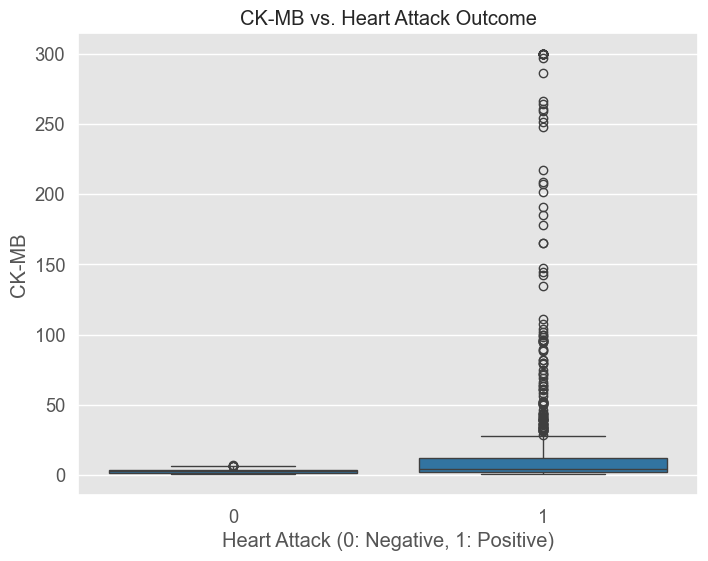


--- T-test for CK-MB vs. Output ---
T-statistic: -10.21, P-value: 0.000
There is a statistically significant difference in CK-MB between positive and negative heart attack outcomes.


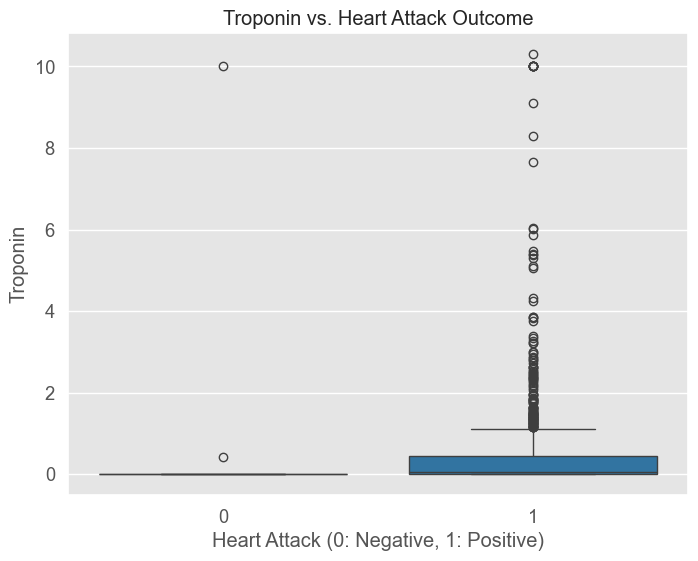


--- T-test for Troponin vs. Output ---
T-statistic: -10.33, P-value: 0.000
There is a statistically significant difference in Troponin between positive and negative heart attack outcomes.


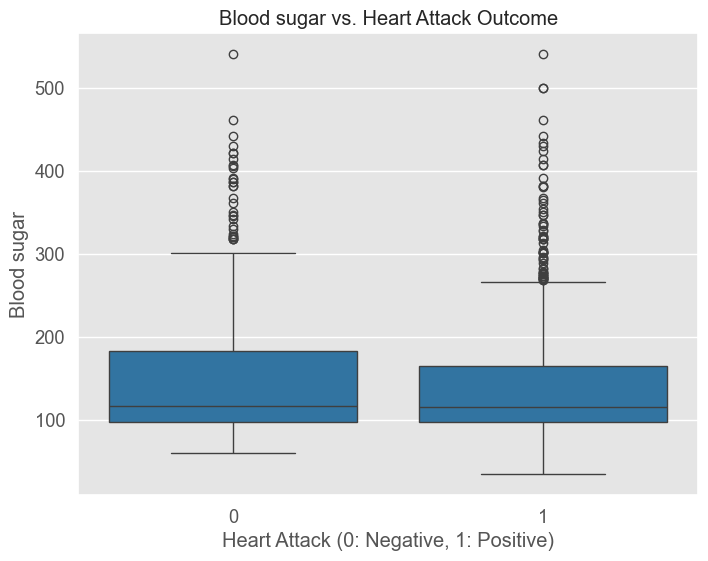


--- T-test for Blood sugar vs. Output ---
T-statistic: 1.18, P-value: 0.238
There is no statistically significant difference in Blood sugar between positive and negative heart attack outcomes.


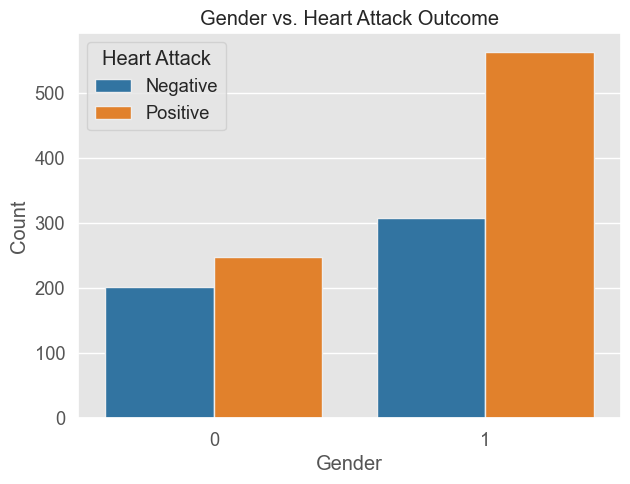


--- Chi-squared Test for Gender vs. Output ---
Chi-squared statistic: 11.36, P-value: 0.001
There is a statistically significant association between Gender and heart attack outcome.


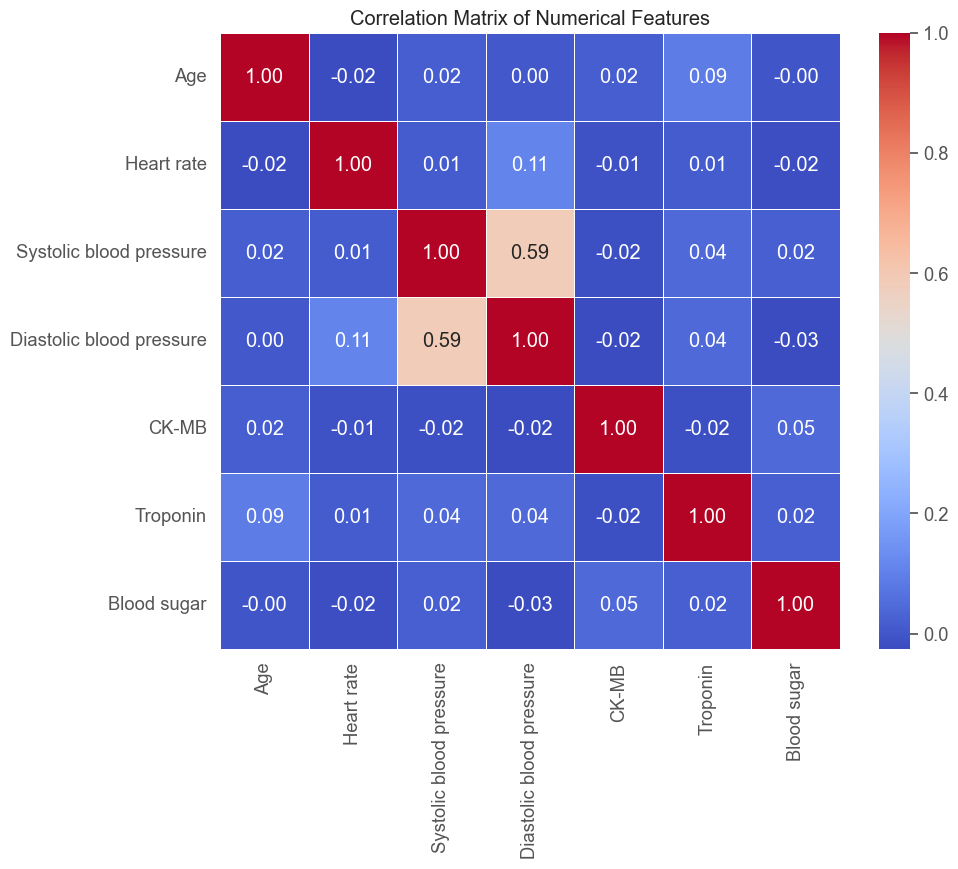


--- Correlation of Numerical Features with Output ---
Result                      1.000000
Age                         0.238097
Troponin                    0.229376
CK-MB                       0.217720
Heart rate                  0.006920
Diastolic blood pressure   -0.009659
Systolic blood pressure    -0.020825
Blood sugar                -0.033059
Name: Result, dtype: float64


In [35]:
# --- Numerical Features vs. Output (Heart Attack) ---
df["Result"] = df["Result"].map({"positive": 1, "negative": 0})
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Result', y=col, data=df)
    plt.title(f'{col} vs. Heart Attack Outcome')
    plt.xlabel('Heart Attack (0: Negative, 1: Positive)')
    plt.ylabel(col)
    plt.show()

    # Statistical Test: Independent Samples T-test (assuming normal distribution for each group)
    # If data is not normal, consider Mann-Whitney U test
    group_0 = df[df['Result'] == 0][col].dropna()
    group_1 = df[df['Result'] == 1][col].dropna()
    if len(group_0) > 1 and len(group_1) > 1: # Ensure enough data for test
        t_stat, p_val = stats.ttest_ind(group_0, group_1, equal_var=False) # Welch's T-test, robust to unequal variances
        print(f"\n--- T-test for {col} vs. Output ---")
        print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.3f}")
        if p_val < 0.05:
            print(f"There is a statistically significant difference in {col} between positive and negative heart attack outcomes.")
        else:
            print(f"There is no statistically significant difference in {col} between positive and negative heart attack outcomes.")
    else:
        print(f"Not enough data in both groups to perform T-test for {col}.")


# --- Categorical Features vs. Output (Heart Attack) ---
for col in ['Gender']: # Excluding 'output' itself
    plt.figure(figsize=(7, 5))
    sns.countplot(x=col, hue='Result', data=df)
    plt.title(f'{col} vs. Heart Attack Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Heart Attack', labels=['Negative', 'Positive'])
    plt.show()

    # Statistical Test: Chi-squared Test for Independence
    contingency_table = pd.crosstab(df[col], df['Result'])
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"\n--- Chi-squared Test for {col} vs. Output ---")
    print(f"Chi-squared statistic: {chi2:.2f}, P-value: {p_val:.3f}")
    if p_val < 0.05:
        print(f"There is a statistically significant association between {col} and heart attack outcome.")
    else:
        print(f"There is no statistically significant association between {col} and heart attack outcome.")


# --- Numerical Features: Correlation Matrix ---
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Correlation with 'output'
print("\n--- Correlation of Numerical Features with Output ---")
print(df[numerical_cols + ['Result']].corr()['Result'].sort_values(ascending=False))

<Figure size 1500x1500 with 0 Axes>

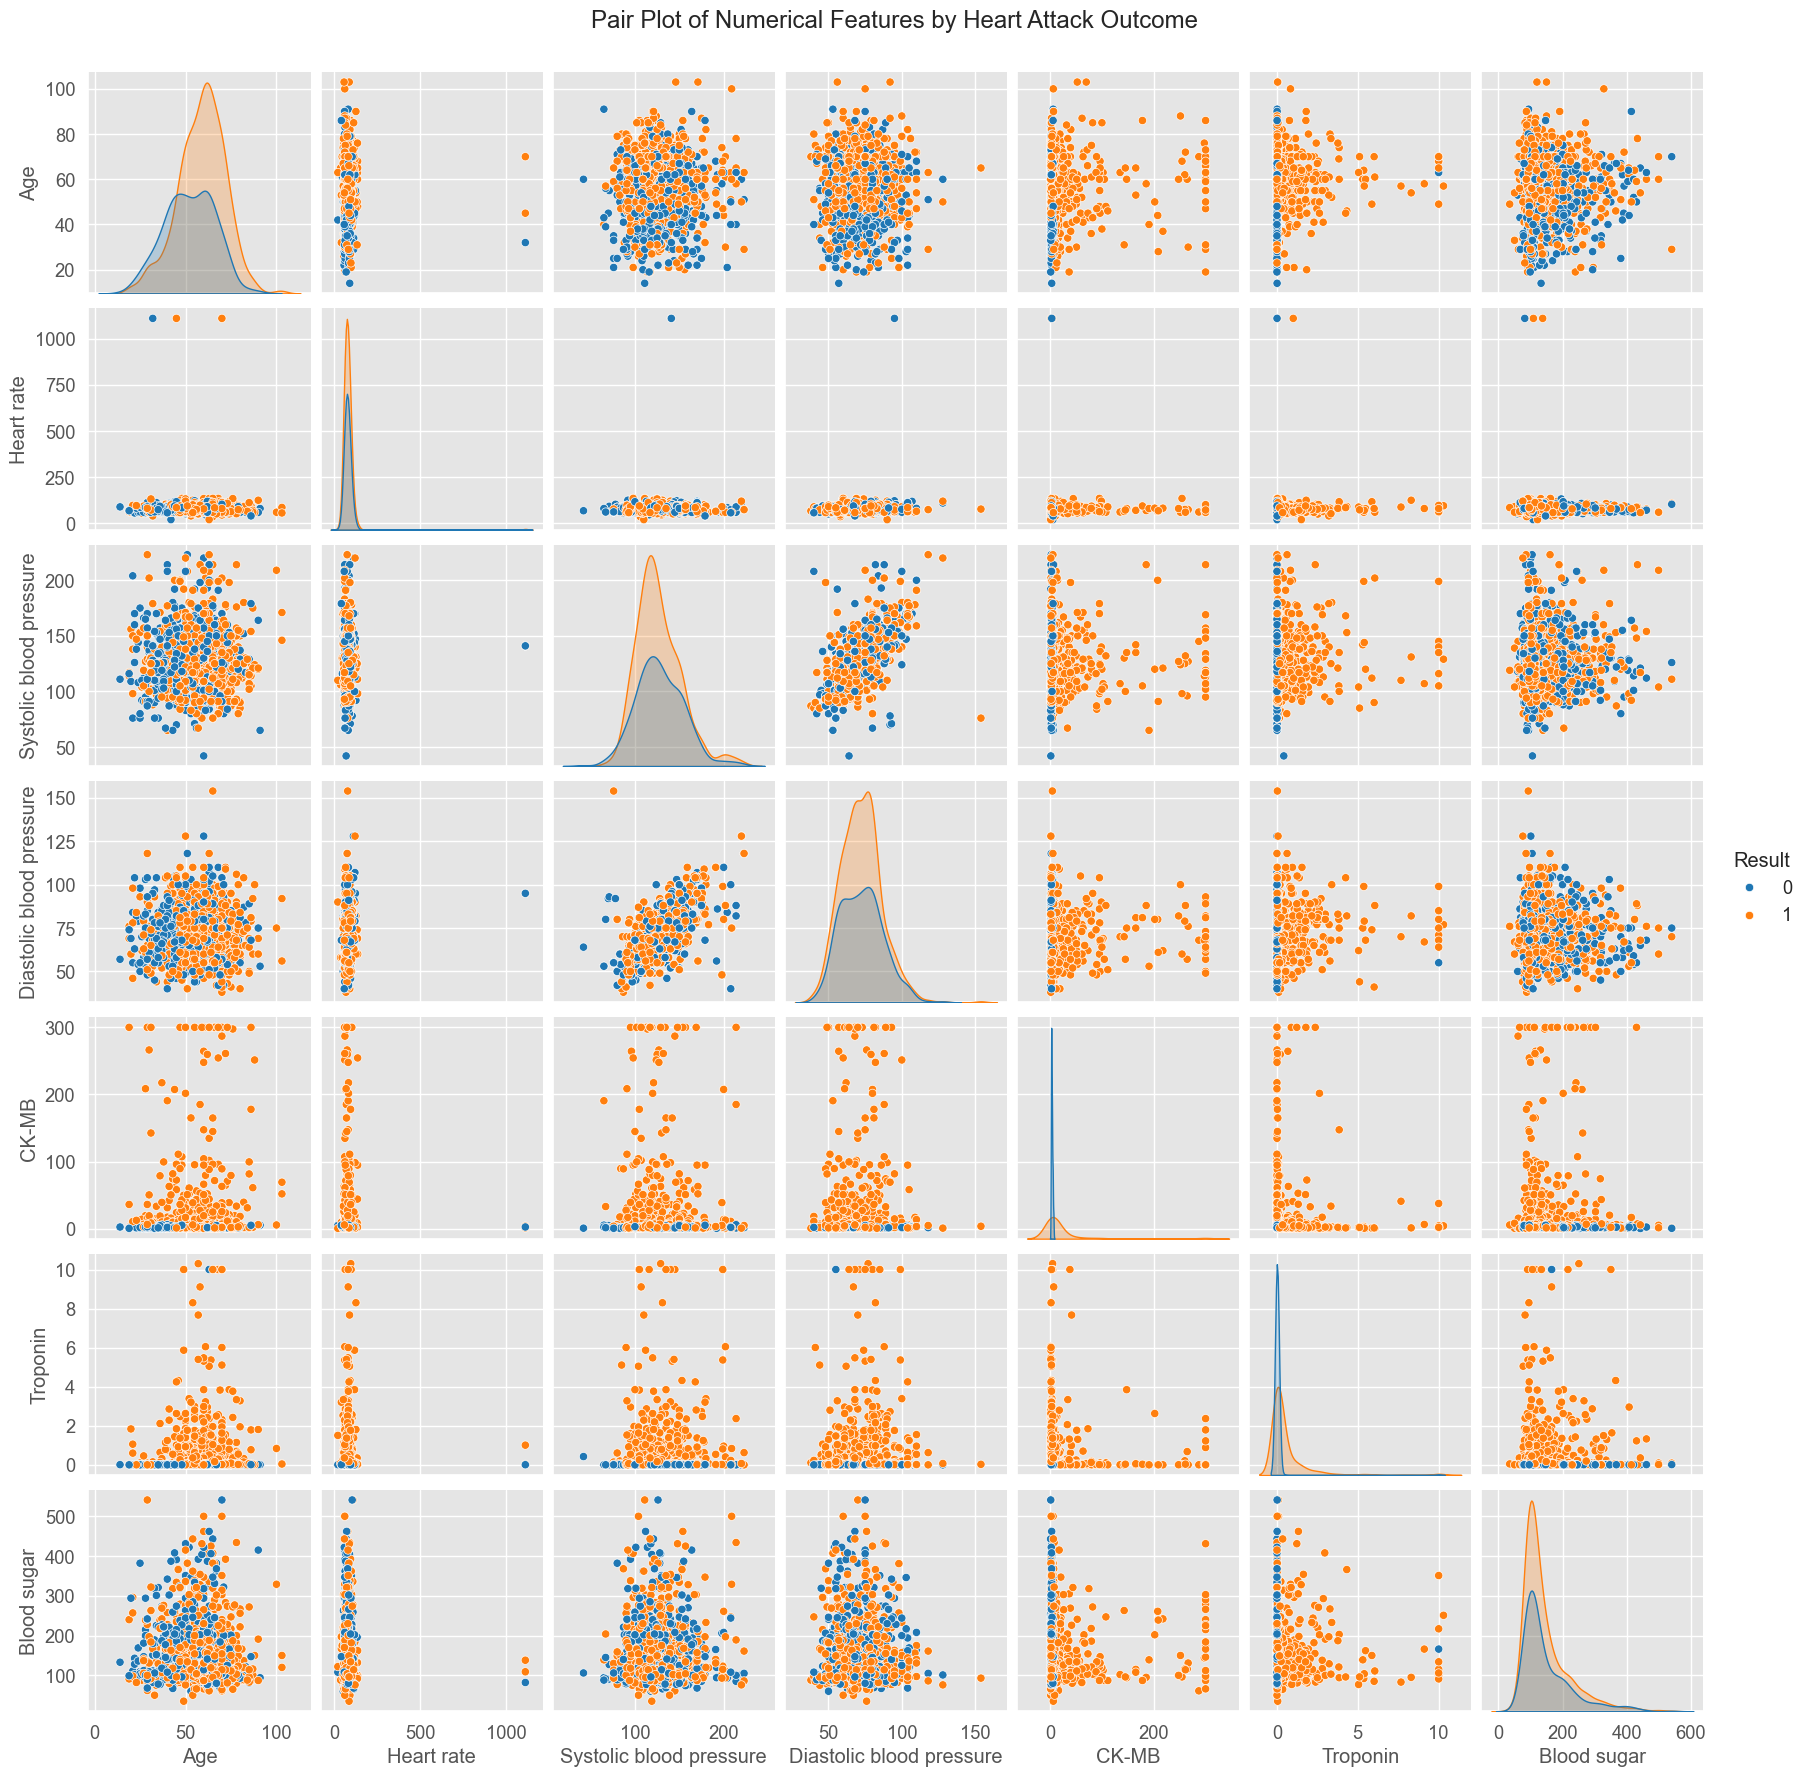

In [36]:
# Pair Plot for numerical features (can be time-consuming for large datasets)
# Consider sampling or selecting a subset of features if dataset is very large
plt.figure(figsize=(15, 15)) # Adjust figure size if needed
sns.pairplot(df[numerical_cols + ['Result']], hue='Result', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features by Heart Attack Outcome', y=1.02)
plt.show()

In [37]:
# Example of identifying outliers using IQR method for 'systolic blood pressure'
Q1 = df['Systolic blood pressure'].quantile(0.25)
Q3 = df['Systolic blood pressure'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_sbp = df[(df['Systolic blood pressure'] < lower_bound) | (df['Systolic blood pressure'] > upper_bound)]
print("\n--- Outliers in Systolic Blood Pressure (IQR Method) ---")
print(outliers_sbp[['Systolic blood pressure', 'Result']])

# Handling outliers (conceptual discussion):
# 1. Removal: If outliers are due to data entry errors and few in number.
# 2. Capping/Winsorization: Replacing outliers with a certain percentile value.
#    Example: df['systolic blood pressure'] = np.where(df['systolic blood pressure'] > upper_bound, upper_bound, df['systolic blood pressure'])
# 3. Transformation: Log transformation or square root transformation can reduce the impact of outliers.
# 4. Robust models: Using models less sensitive to outliers (e.g., tree-based models).


--- Outliers in Systolic Blood Pressure (IQR Method) ---
      Systolic blood pressure  Result
7                         214       1
12                        199       1
89                        202       1
186                       193       0
209                        42       0
220                       220       0
311                       208       1
411                       198       1
427                       214       1
428                       204       0
429                       200       1
486                       223       1
645                       200       1
667                       214       1
670                       223       0
673                       199       1
744                       202       1
781                       214       1
857                       198       0
896                       209       1
926                       208       1
969                       200       0
996                       214       0
999                       223 

In [40]:
df[df["Heart rate"] > 500]

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
63,45,1,1111,141,95,109.0,1.33,1.010,1
717,70,0,1111,141,95,138.0,3.87,0.028,1
1069,32,0,1111,141,95,82.0,2.66,0.008,0
